# Footprints of other Galactic Plane Surveys

A range of other surveys have or will observe some or all of the Galactic Plane, and it is valuable to take these regions into account when designing the Roman Plane survey.  This maximizes the science return from all of the dataset by providing complementary wavelength coverage as well as higher spatial resolution imaging for deblending. 

The goal of this notebook is to explore the footprints of these surveys.  

In [23]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
import survey_footprints
import config_utils
from astropy import units as u 
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt
import numpy as np
from astropy_healpix import HEALPix
from astropy.coordinates import SkyCoord, ICRS
%matplotlib inline
import healpy as hp
import json

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

# Load configuration 
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

The footprints of other surveys are defined in JSON format as HEALpixel maps in the config directory.  They can be loaded using the convenience functions provided:

In [2]:
survey_regions = survey_footprints.load_survey_footprints(sim_config, root_dir)
survey_regions

{'rubin_galactic_plane': array([0., 0., 0., ..., 0., 0., 0.]),
 'DECaPS2': array([0., 0., 0., ..., 0., 0., 0.]),
 'BDBS': array([0., 0., 0., ..., 0., 0., 0.]),
 'Baade': array([0., 0., 0., ..., 0., 0., 0.]),
 'stellar_density': {'F062': array([0., 0., 0., ..., 0., 0., 0.]),
  'F087': array([0., 0., 0., ..., 0., 0., 0.]),
  'F106': array([0., 0., 0., ..., 0., 0., 0.]),
  'F129': array([0., 0., 0., ..., 0., 0., 0.]),
  'F158': array([0., 0., 0., ..., 0., 0., 0.]),
  'F184': array([0., 0., 0., ..., 0., 0., 0.]),
  'F213': array([0., 0., 0., ..., 0., 0., 0.]),
  'F146': array([0., 0., 0., ..., 0., 0., 0.]),
  'G150': array([0., 0., 0., ..., 0., 0., 0.]),
  'P127': array([0., 0., 0., ..., 0., 0., 0.])}}

By default, this loads the Rubin survey footprint outline rather than the HEALpixel priority map but we can load that too...

In [3]:
survey_regions['rubin_galactic_plane'] = survey_footprints.load_rubin_galplane_footprint(
    root_dir, 
    cat_file='rubin_galplane_survey_priority_footprint.json'
)

We also want to load the BlackCat catalog...

In [4]:
blackcats = survey_footprints.load_catalog(path.join(root_dir, 'config'), 'blackcat_catalog.csv')
blackcats

[{'pointing': [321.8163989, -0.00332943, 0.1]},
 {'pointing': [8.6416052, 10.25479693, 0.1]},
 {'pointing': [1.1471843, -3.727514, 0.1]},
 {'pointing': [151.16113, 5.29973, 0.1]},
 {'pointing': [251.532037, -20.67473903, 0.1]},
 {'pointing': [309.2640654, -1.10297116, 0.1]},
 {'pointing': [351.9548777, -0.96630145, 0.1]},
 {'pointing': [8.769557, -1.98090632, 0.1]},
 {'pointing': [336.2881394, 0.31248069, 0.1]},
 {'pointing': [35.8535506, 10.1591562, 0.1]},
 {'pointing': [20.1116048, 3.94826128, 0.1]},
 {'pointing': [343.2512784, 0.05342834, 0.1]},
 {'pointing': [323.7240835, -1.12885997, 0.1]},
 {'pointing': [359.6444754, -0.17656165, 0.1]},
 {'pointing': [358.7115137, -0.65799919, 0.1]},
 {'pointing': [8.1151012, -6.5448459, 0.1]},
 {'pointing': [3.6476003, 0.10353821, 0.1]},
 {'pointing': [2.1108255, 1.40326586, 0.1]},
 {'pointing': [29.9025737, -6.84402939, 0.1]},
 {'pointing': [304.2379729, -7.61898877, 0.1]},
 {'pointing': [13.9456207, -5.35432173, 0.1]},
 {'pointing': [325.08486

We also load the Bonito SFRs for comparison...

In [6]:
bonito = survey_footprints.load_catalog(path.join(root_dir, 'config'), 'bonito_sfrs.csv')
bonito

[{'pointing': [287.60158, -0.64452, 4.0]},
 {'pointing': [6.0828, -1.3313, 0.23]},
 {'pointing': [208.821, -19.261, 1.1]},
 {'pointing': [16.9615, 0.8106, 1.4]},
 {'pointing': [202.9407, 2.1659, 4.0]}]

For the purposes of plotting, we first co-add the HEALpixel arrays into a single sky map, where value represents the number of surveys that include each HEALpixel.  

In [8]:
NPIX = hp.nside2npix(sim_config['NSIDE'])
all_survey_footprint = np.zeros(NPIX)
for name, arr in survey_regions.items():
    if name != 'stellar_density':
        all_survey_footprint += arr

### Plot survey regions

Here we visualize the footprints of different Galactic Plane surveys, using different tools.

Firstly, the healpy package provides a Mollweide plotting function which is widely used by Rubin.  

/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_72649/466754956.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

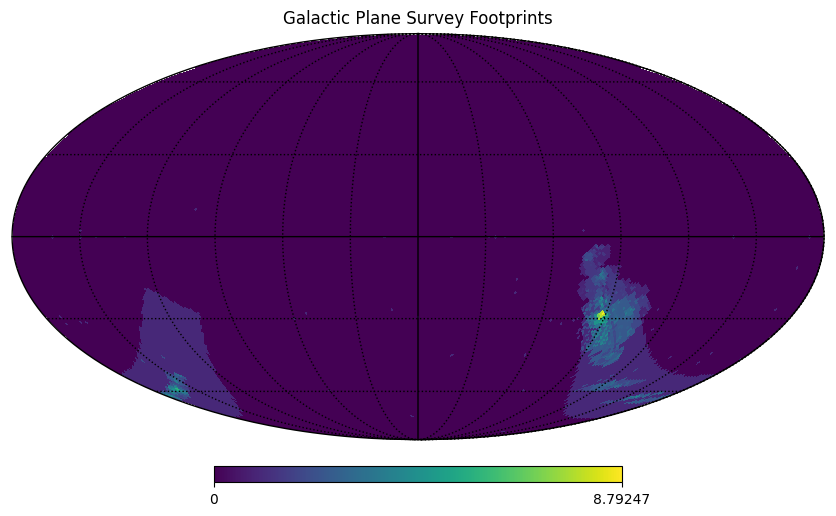

In [9]:
fig = plt.figure(1,(10,10))
hp.mollview(all_survey_footprint, title='Galactic Plane Survey Footprints')
hp.graticule()
plt.tight_layout()

Alternatively there is the mw_plot package which provides tools to plot survey regions over graphics of the Galaxy in the optical or NIR.
This package also makes it easier to overplot point sources.

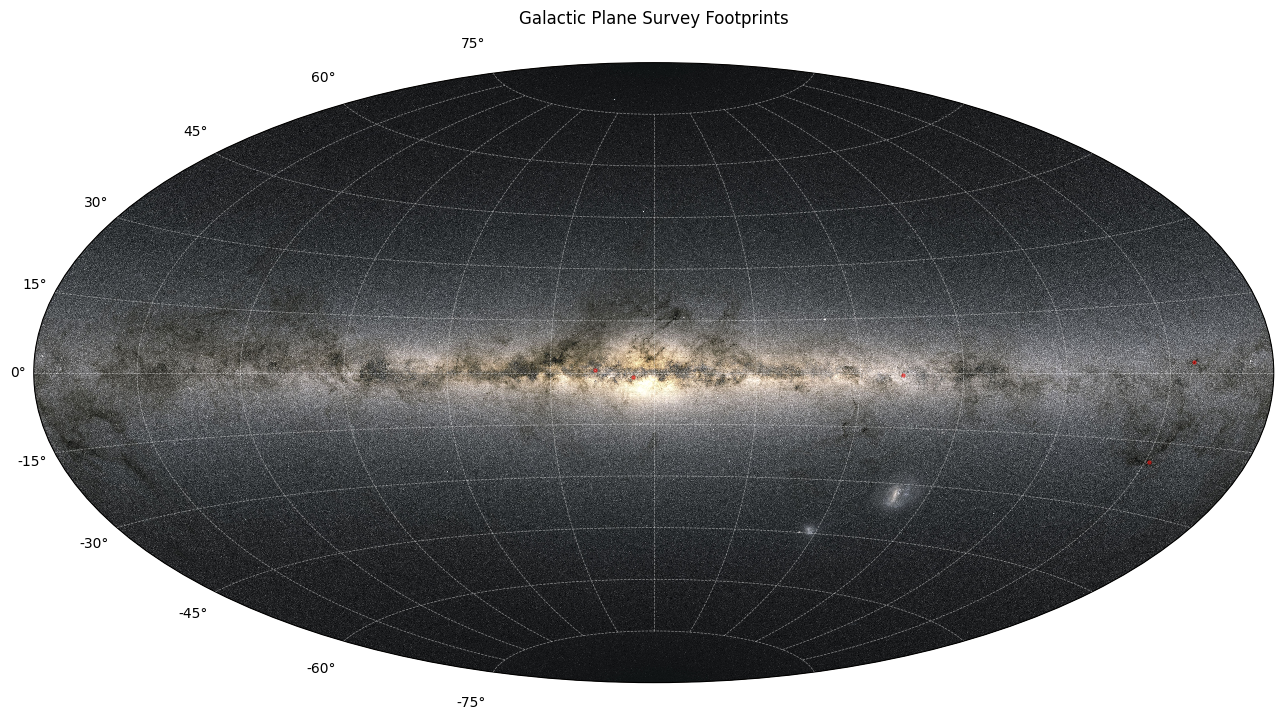

In [10]:
plot_colors = {
    'rubin_galactic_plane': '#01a27d',  # Rubin turquoise
     'DECaPS2': '#d68302', # Burnt orange
    'BDBS': '#63ff4e', # Lime green
    'blackcats': '#f74eff', # Magenta
    'bonito': '#ff0400' # Red
}

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='optical', figsize=(16,10))
mw1.title = 'Galactic Plane Survey Footprints'
proj = HEALPix(nside=64, order='ring', frame='icrs')
#for name, skymap in survey_regions.items():
#    pixels = np.where(skymap > 0)[0]
#    s = proj.healpix_to_skycoord(pixels)
#    mw1.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c=plot_colors[name], s=5, alpha=0.4)

#for source in blackcats:
#    s = SkyCoord(source['pointing'][0], source['pointing'][1], frame='galactic', unit=(u.deg, u.deg))
#    s = s.transform_to(ICRS)
#    mw1.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c=plot_colors['blackcats'], s=5, alpha=0.4)

for source in bonito:
    s = SkyCoord(source['pointing'][0], source['pointing'][1], frame='galactic', unit=(u.deg, u.deg))
    s = s.transform_to(ICRS)
    mw1.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c=plot_colors['bonito'], s=5, alpha=0.4)


## Stellar density map

A number of science cases have preferred footprints that correlate closely with the distribution of stars across the Milky Way. 
For these cases, the survey footprint map is a function of the stellar density.  However, the raw stellar map data is unsuitable because the numbers per HEALpixel represent actual stellar density whereas the maps for survey footprint are typically binary (0=HEALpixel not included, 1=HEALpixel within footprint) or have a priority value between 0 and ~10.  

So here we scale the stellar density map data to generate nominal survey footprint based on stellar density above a threshold, using a pixel scaling comparable to the other survey footprint maps. 

The stellar density data varies a function of filter due to extinction.  To maximize the survey footprint we use the densities for the filter with lowest extinction, F213.

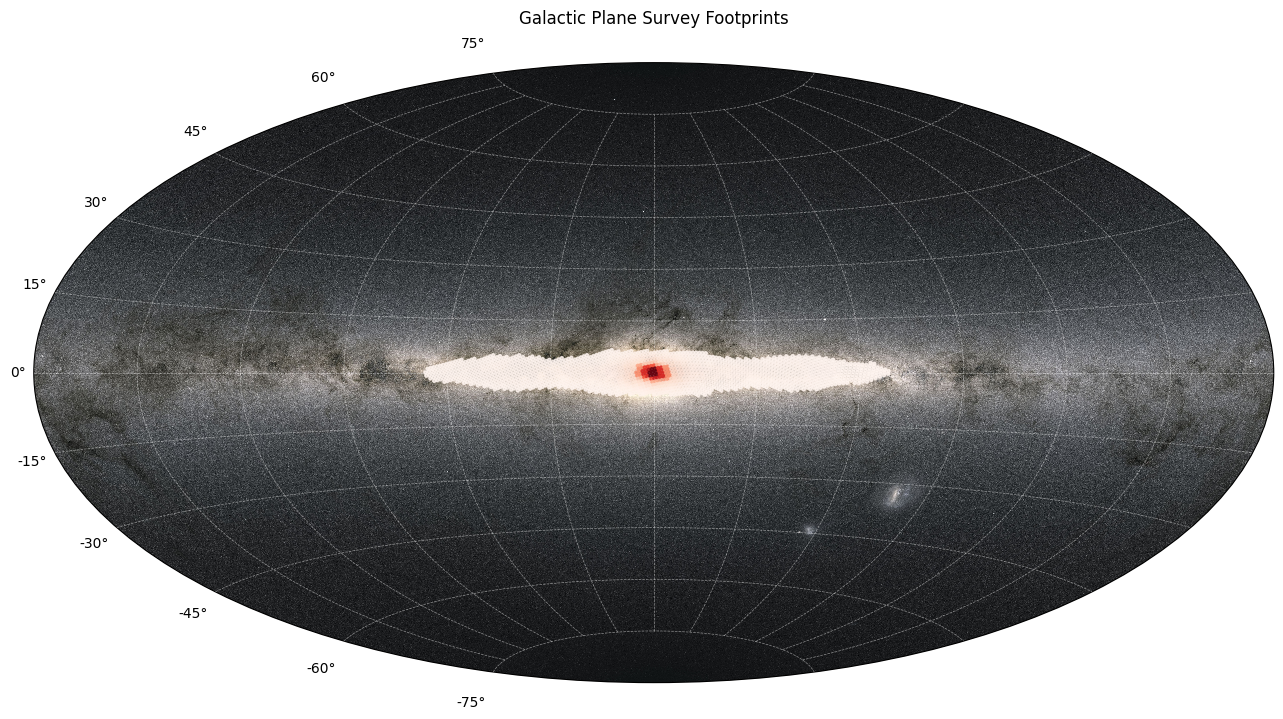

In [22]:
map_data = survey_regions['stellar_density']['F213']
max_density = map_data.max()
map_data = map_data / max_density

threshold = 0.005
pixels = np.where(map_data > threshold)[0]

mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='optical', figsize=(16,10))
mw1.title = 'Galactic Plane Survey Footprints'
proj = HEALPix(nside=64, order='ring', frame='icrs')
s = proj.healpix_to_skycoord(pixels)
mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, c=map_data[pixels], cmap='Reds', s=5, alpha=0.8)


We output this as a survey map for science cases that require fields of high stellar density.

In [26]:
NPIX = hp.nside2npix(sim_config['NSIDE'])
survey_map = np.zeros(NPIX)
survey_map[pixels] = map_data[pixels]

survey_config = {
    "nside": sim_config['NSIDE'],
    "healpix_resolution_deg": hp.nside2pixarea(sim_config['NSIDE'], degrees=True),
    "n_healpix": NPIX,
    "healpix_map": survey_map.tolist()
}

output_file = path.join(root_dir, 'config', 'stellar_density_footprint.json')
with open(output_file, 'w') as f:
    json.dump(survey_config, f, indent=4)